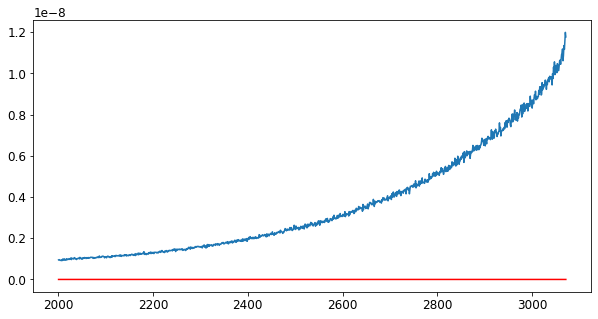

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 931
         Function evaluations: 1692
[ 4.51535893e-03  1.32637387e-03 -4.70399897e+07] 5.103036178126681e-16


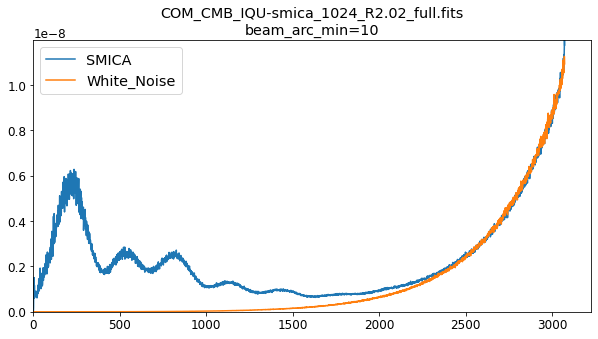

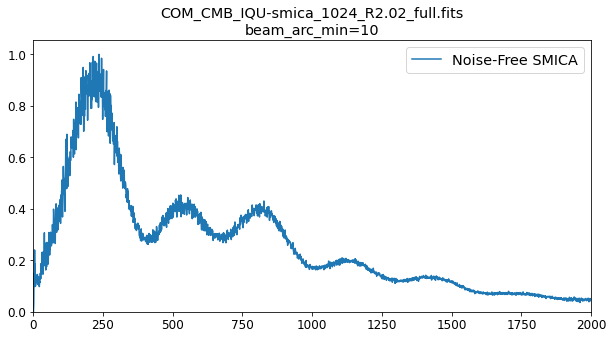

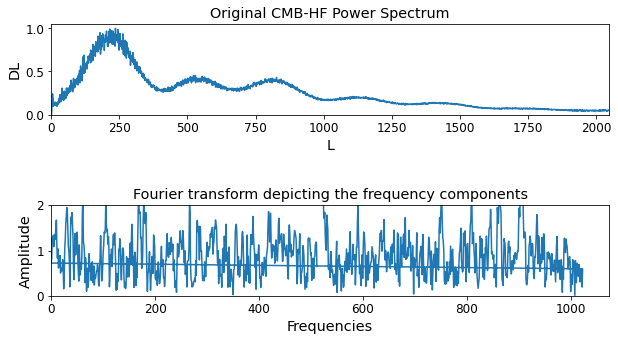

In [1]:
import matplotlib.pylab as plt
import healpy as hp
import numpy as np
import math
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.special import sici, sinc
import pandas as pd
from astropy.convolution import convolve, Gaussian1DKernel
from lib4 import *
from scipy.optimize import curve_fit


beam_arc_min=10
thishome = "/home/mp74207/Desktop/HomeHome/Dropbox/GitHub/AAA_CMB_HU/DataSupernovaLBLgov/"
# https://irsa.ipac.caltech.edu/data/Planck/release_3/all-sky-maps/matrix_bpasscorr.html
# https://irsa.ipac.caltech.edu/data/Planck/release_2/all-sky-maps/maps/component-maps/cmb/COM_CMB_IQU-smica_1024_R2.02_full.fits

smicafiles = [
              # "COM_CMB_IQU-nilc_2048_R3.00_full.fits",
#               "COM_CMB_IQU-sevem_2048_R3.01_full.fits",
              # "COM_CMB_IQU-smica_1024_R2.01_full.fits",
              "COM_CMB_IQU-smica_1024_R2.02_full.fits",
              # "COM_CMB_IQU-smica_2048_R3.00_full.fits",
              # "COM_CMB_IQU-smica-nosz_2048_R3.00_full.fits",
              # "LFI_SkyMap_030-BPassCorrected_1024_R3.00_full.fits",
              # "LFI_SkyMap_044-BPassCorrected_1024_R3.00_full.fits",
              # "LFI_SkyMap_070-BPassCorrected_1024_R3.00_full.fits",
              ]



diffmap = np.load("./img1/diffmap.npy")
mygauss = fitClass()
for f in smicafiles:
    planck_IQU_SMICA = hp.fitsfunc.read_map(thishome + f, dtype= float)
    if "1024" in f:
        nside=1024
    if "2048" in f:
        nside=2048
    mu_smica, sigma_smica = norm.fit(planck_IQU_SMICA)
    white_noise = np.ma.asarray(np.random.normal(0, sigma_smica, 12 * nside ** 2))
    cl_WHITE_NOISE, dll_WHITE_NOISE, ell = get_dl(white_noise, nside=nside, beam_arc_min=1)
#     for beam_arc_min in [10]:
    cl_SMICA, dll_SMICA, ell = get_dl(planck_IQU_SMICA, nside=nside, beam_arc_min=beam_arc_min)
    mygauss.smica=dll_SMICA[ell>2000]
    mygauss.t = ell[ell>2000]
    mygauss.white_noise = dll_WHITE_NOISE[ell > 2000]
    x0 = np.array([ 0,  1.02461539e-2, -1.00693933e-03])
    mygauss.plotme(x0)
    xout, err = mygauss.optimizeme(x0)
    print(xout, err)
    mygauss.smica=dll_SMICA
    mygauss.t = ell
    mygauss.white_noise = dll_WHITE_NOISE
    adjWN = mygauss.correctWN(xout)
    ymax = np.max(dll_SMICA)
    plt.plot(ell, dll_SMICA, ell, adjWN)
    plt.legend([ "SMICA", "White_Noise"])
    plt.ylim([0,ymax])
    plt.xlim([0,None])
    plt.title(f + "\n"+ "beam_arc_min={}".format(beam_arc_min))
    plt.show()
    dll_SMICA_Clean_NoNoise = dll_SMICA-adjWN
    dll_SMICA_Clean_NoNoise /= np.max(dll_SMICA_Clean_NoNoise[0:500])
    plt.plot(ell, dll_SMICA_Clean_NoNoise)
    plt.legend([ "Noise-Free SMICA"])
    plt.ylim([0,None])
    plt.xlim([0,2000])
    plt.title(f + "\n"+ "beam_arc_min={}".format(beam_arc_min))
    plt.show()



    # Laplace transform (t->s)
    y = dll_SMICA_Clean_NoNoise[1:2048]
    t = ell[1:2048]
    y[y <= 0] = 0.0
    # Frequency domain representation
    samplingFrequency=2048
    # Create subplot
    figure, axis = plt.subplots(2, 1)
    plt.subplots_adjust(hspace=1)

    # Time domain representation for sine wave 1
    axis[0].set_title('Original CMB-HF Power Spectrum')
    axis[0].plot(t, y)
    axis[0].set_xlim([0,2048])
    axis[0].set_ylim([0, None])
    axis[0].set_xlabel('L')
    axis[0].set_ylabel('DL')
    # plt.show()
    # Time domain representation for sine wave 2
    fourierTransform = np.fft.fft(y)   # Normalize amplitude
    fourierTransform = fourierTransform[range(int(len(y) / 2))]  # Exclude sampling frequency
    tpCount = len(y)
    values = np.arange(int(tpCount / 2))
    timePeriod = tpCount / samplingFrequency
    frequencies = np.fft.fftshift(values / timePeriod)
    periods = 1/frequencies
    # Frequency domain representation
    axis[1].set_title('Fourier transform depicting the frequency components')
    axis[1].plot(frequencies, abs(fourierTransform))
    axis[1].set_xlabel('Frequencies')
    axis[1].set_ylabel('Amplitude')
    axis[1].set_xlim(0,None)
    axis[1].set_ylim(0, 2)
    plt.show()
    a=1


[, 5.561091354168629, 70.4904981435091, 69.97258302497708, -0.0003403478728878247, 17.7476396294433, 155.49794124879259, 91.293928331194, -0.008023058918094777, 10.992182158547315, 510.68030006952466, 94.39587594616042, -0.00238029882978211, 5.832242720307981, 788.3095484213306, 104.27101278519706, -0.0024247544228744376, 6.3751833028504095, 1117.689313970065, 107.53104107355458, -0.0009985171876270378, 4.269292985592003, 1411.5448254567805, 92.6639052294866, -0.0004312568223671055, 5.461647151237034, 1619.3811640136537, 296.82601511458944, -0.0007959245973875501, ]


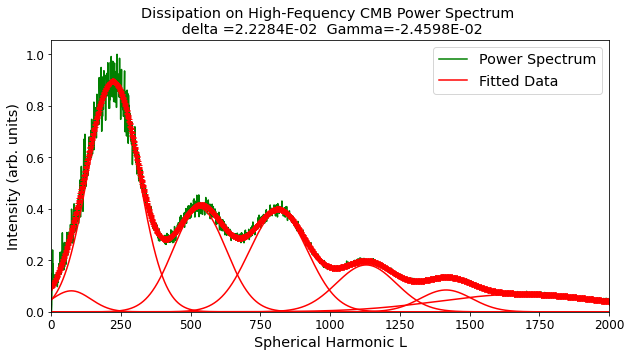

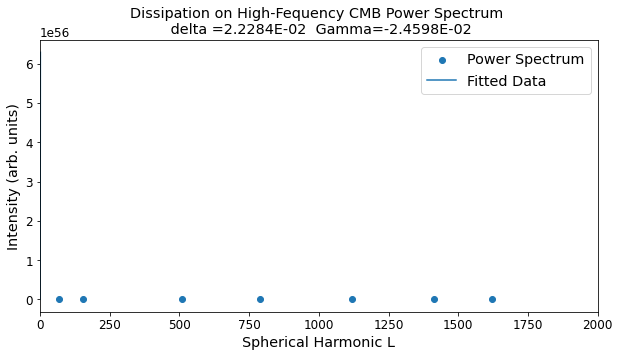

In [2]:
mygauss.n = 7
parguess = np.array(   
[[5.67766562e+00,7.16843706e+01,7.01259201e+01,-1.49380251e-04]
,[1.77317018e+01,1.55589417e+02,9.12662349e+01,-8.02214139e-03]
,[1.09938425e+01,5.10672324e+02,9.44141149e+01,-2.38052477e-03]
,[5.83261475e+00,7.88325609e+02,1.04260021e+02,-2.42483337e-03]
,[6.39285772e+00,1.11771338e+03,1.07695353e+02,-1.00096760e-03]
,[4.30359348e+00,1.41145829e+03,9.29689461e+01,-4.36713118e-04]
,[5.43566496e+00,1.62674171e+03,2.94367187e+02,-7.94027107e-04]]
)


ix=0
fx=2000
popt, err = curve_fit(mygauss.six_peaks, ell[ix:fx], dll_SMICA_Clean_NoNoise[ix:fx], parguess)
print("[", *popt, "]" , sep=", ")
parguess = np.array(popt).reshape([mygauss.n, 4])
parguess = parguess[parguess[:, 1].argsort()]
centers = np.array([parguess[x, 1] for x in np.arange(mygauss.n)])
freqs = centers[1::] - centers[0:-1:]
amplt = np.array([parguess[x, 0]* np.exp(-parguess[x, 3] * parguess[x, 0]) for x in np.arange(mygauss.n)])
fitting1 = np.polyfit(centers, np.log(amplt), 1)
yy = np.exp(fitting1[1]) * np.exp(fitting1[0] * ell)
# First peak is at pi/2=l*Delta => Delta=pi/2/l
delta = np.pi / 2 / centers[0]
gamma1 = fitting1[0] / delta

################################################################
################################################################
fig, axis1 = plt.subplots()
axis1.plot(ell, dll_SMICA_Clean_NoNoise, color="green")
for i in np.arange(mygauss.n):
    axis1.plot(ell, mygauss.fitfun(ell, *parguess[i, :]), 'r-')
axis1.plot(ell, mygauss.six_peaks(ell, *popt), 'r+')
axis1.set_xlim([0, 2000])
axis1.set_ylim([0, None])
axis1.set_xlabel('Spherical Harmonic L')
axis1.set_ylabel('Intensity (arb. units)')
axis1.set_title("Dissipation on High-Fequency CMB Power Spectrum \n delta ={}  Gamma={}".format('%.4E', '%.4E') %
          (delta, gamma1))
plt.legend(['Power Spectrum', 'Fitted Data'])
plt.savefig('./img1/HighFreqFittedPowerSpectrum.png')
plt.show()


fig, axis1 = plt.subplots()
fitting1 = np.polyfit(centers, np.log(amplt), 1)
yy = np.exp(np.exp(fitting1[0] + fitting1[1]) ** ell)
# First peak is at pi/2=l*Delta => Delta=pi/2/l
plt.scatter(centers, np.log(amplt))  # THIS IS WHAT i AM PLOTTING 
plt.plot(ell, yy)
plt.xlim([0, 2000])
# plt.ylim([-200, 2000])
plt.xlabel('Spherical Harmonic L')
plt.ylabel('Intensity (arb. units)')
plt.title("Dissipation on High-Fequency CMB Power Spectrum \n delta ={}  Gamma={}".format('%.4E', '%.4E') % (
    delta, gamma1))
plt.legend(['Power Spectrum', 'Fitted Data'])
# plt.savefig('./img1/HighFreqDissipationFittedPowerSpectrum.png')
plt.show()

In [3]:
print(parguess)

[[ 5.56109135e+00  7.04904981e+01  6.99725830e+01 -3.40347873e-04]
 [ 1.77476396e+01  1.55497941e+02  9.12939283e+01 -8.02305892e-03]
 [ 1.09921822e+01  5.10680300e+02  9.43958759e+01 -2.38029883e-03]
 [ 5.83224272e+00  7.88309548e+02  1.04271013e+02 -2.42475442e-03]
 [ 6.37518330e+00  1.11768931e+03  1.07531041e+02 -9.98517188e-04]
 [ 4.26929299e+00  1.41154483e+03  9.26639052e+01 -4.31256822e-04]
 [ 5.46164715e+00  1.61938116e+03  2.96826015e+02 -7.95924597e-04]]


[, 5.561091354168629, 70.4904981435091, 69.97258302497708, -0.0003403478728878247, 17.7476396294433, 155.49794124879259, 91.293928331194, -0.008023058918094777, 10.992182158547315, 510.68030006952466, 94.39587594616042, -0.00238029882978211, 5.832242720307981, 788.3095484213306, 104.27101278519706, -0.0024247544228744376, 6.3751833028504095, 1117.689313970065, 107.53104107355458, -0.0009985171876270378, 4.269292985592003, 1411.5448254567805, 92.6639052294866, -0.0004312568223671055, 5.461647151237034, 1619.3811640136537, 296.82601511458944, -0.0007959245973875501, ]


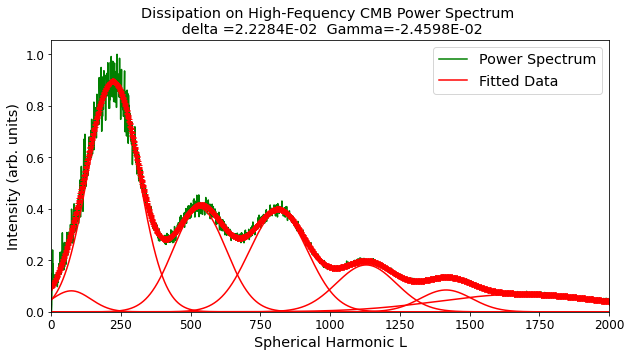

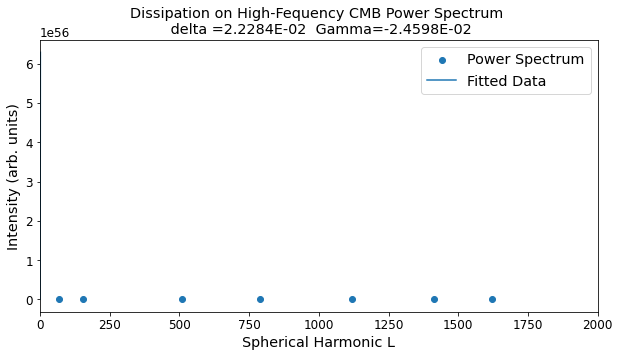

In [4]:
mygauss.n = 7

parguess = np.array(   
[[5.67766562e+00,7.16843706e+01,7.01259201e+01,-1.49380251e-04]
,[1.77317018e+01,1.55589417e+02,9.12662349e+01,-8.02214139e-03]
,[1.09938425e+01,5.10672324e+02,9.44141149e+01,-2.38052477e-03]
,[5.83261475e+00,7.88325609e+02,1.04260021e+02,-2.42483337e-03]
,[6.39285772e+00,1.11771338e+03,1.07695353e+02,-1.00096760e-03]
,[4.30359348e+00,1.41145829e+03,9.29689461e+01,-4.36713118e-04]
,[5.43566496e+00,1.62674171e+03,2.94367187e+02,-7.94027107e-04]]
)


ix=0
fx=2000
popt, err = curve_fit(mygauss.six_peaks, ell[ix:fx], dll_SMICA_Clean_NoNoise[ix:fx], parguess)
print("[", *popt, "]" , sep=", ")
parguess = np.array(popt).reshape([mygauss.n, 4])
parguess = parguess[parguess[:, 1].argsort()]
centers = np.array([parguess[x, 1] for x in np.arange(mygauss.n)])
freqs = centers[1::] - centers[0:-1:]
amplt = np.array([parguess[x, 0]* np.exp(-parguess[x, 3] * parguess[x, 0]) for x in np.arange(mygauss.n)])
fitting1 = np.polyfit(centers, np.log(amplt), 1)
yy = np.exp(fitting1[1]) * np.exp(fitting1[0] * ell)
# First peak is at pi/2=l*Delta => Delta=pi/2/l
delta = np.pi / 2 / centers[0]
gamma1 = fitting1[0] / delta

################################################################
################################################################
fig, axis1 = plt.subplots()
axis1.plot(ell, dll_SMICA_Clean_NoNoise, color="green")
for i in np.arange(mygauss.n):
    axis1.plot(ell, mygauss.fitfun(ell, *parguess[i, :]), 'r-')
axis1.plot(ell, mygauss.six_peaks(ell, *popt), 'r+')
axis1.set_xlim([0, 2000])
axis1.set_ylim([0, None])
axis1.set_xlabel('Spherical Harmonic L')
axis1.set_ylabel('Intensity (arb. units)')
axis1.set_title("Dissipation on High-Fequency CMB Power Spectrum \n delta ={}  Gamma={}".format('%.4E', '%.4E') %
          (delta, gamma1))
plt.legend(['Power Spectrum', 'Fitted Data'])
plt.savefig('./img1/HighFreqFittedPowerSpectrum.png')
plt.show()


fig, axis1 = plt.subplots()
fitting1 = np.polyfit(centers, np.log(amplt), 1)
yy = np.exp(np.exp(fitting1[0] + fitting1[1]) ** ell)
# First peak is at pi/2=l*Delta => Delta=pi/2/l
plt.scatter(centers, np.log(amplt))  # THIS IS WHAT i AM PLOTTING 
plt.plot(ell, yy)
plt.xlim([0, 2000])
# plt.ylim([-200, 2000])
plt.xlabel('Spherical Harmonic L')
plt.ylabel('Intensity (arb. units)')
plt.title("Dissipation on High-Fequency CMB Power Spectrum \n delta ={}  Gamma={}".format('%.4E', '%.4E') % (
    delta, gamma1))
plt.legend(['Power Spectrum', 'Fitted Data'])
# plt.savefig('./img1/HighFreqDissipationFittedPowerSpectrum.png')
plt.show()

In [8]:
yy

array([2.71828183e+00, 9.26016385e+04, 6.28868190e+56, ...,
                  inf,            inf,            inf])

In [6]:
aa[1:]- aa[0:-1:]

array([270.17491572, -77.55311047,  51.7505172 , -35.52425406,
       -86.01917293])

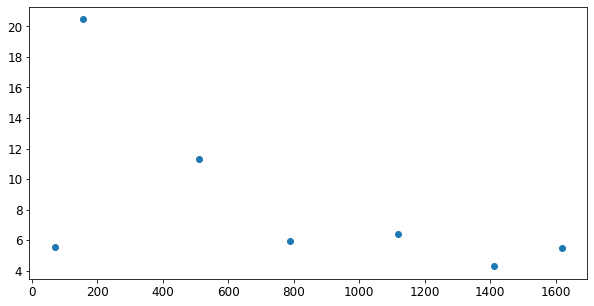

In [7]:
plt.scatter(x=centers, y=amplt)
plt.show()